In [1]:
import os
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time, math
sys.path.append("../")
import common_functions_feb2018_modthesis as cmf2018
import matplotlib.patches as patches
import seaborn.apionly as sns
%matplotlib inline

In [2]:
figsdir='../figs2'
import pandas as pd
from scipy.signal import argrelmax

In [3]:
outdir='./gobi_multseed_rerun/'

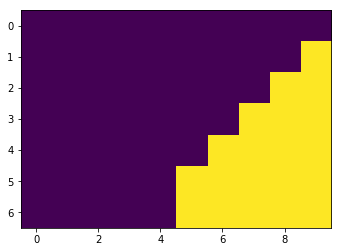

In [4]:
X,Y=np.meshgrid(range(10),range(7))

edge=np.array([9,8,7,6,5,4,4])
plt.imshow(X>edge[:,None])

Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
312 312
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
284 284
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
298 298
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
240 240
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
340 340
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
326 326
wall!


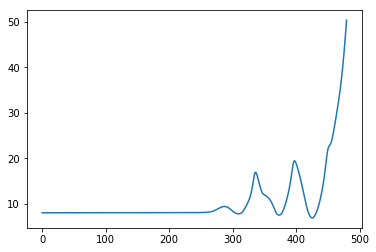

Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
281 281
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
328 328
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
367 367
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
302 302
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
368 368
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
238 238
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
276 276
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
299 299
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
294 294
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
275 275
wall!


common_functions_feb2018_modthesis.py:50: RuntimeWarning: invalid value encountered in less
  a[ data < threshold-tolerance] = -1
common_functions_feb2018_modthesis.py:51: RuntimeWarning: invalid value encountered in greater
  a[ data > threshold+tolerance] = +1


Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
291 291
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
229 229
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
362 362
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
378 378
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
298 298
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
350 350
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
321 321
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
318 318
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
260 260
wall!
Getting c
# 200 480
Getting Ek
# 200 480
Getting S
# 200 480
Getting nk
# 200 480
335 335
wall!
Getting c
# 200 480
Getting Ek
# 200 480

In [10]:
conditions=['WT30','TrkA4',] #'TrkA', 'TrkA2','GltA3'-> not good
maxseed=120
varlist=['c','Ek','S','nk']
maxima=dict()
minima=dict()
average=dict()
for var in varlist[1:]:
    maxima[var]=[[] for x in conditions]
    minima[var]=[[] for x in conditions]
    average[var]=[[] for x in conditions]

st=0.05
#transient=int(3/st)
threshold=11
for c,cond in enumerate(conditions):
   
    for i in range(1,maxseed+1):
        
       
        Ektrace=os.path.join(outdir,'Ek_%d_%s.txt'%(i,cond))
        
        if os.path.isfile(Ektrace):
            Ektrace=np.loadtxt(Ektrace)
            beg_end=cmf2018.identify_peaks_histeresis(Ektrace,threshold=threshold,tolerance_p=0.03) #peak identification based on normalise
            if beg_end is not None and len(beg_end[0])>=2:
                output_dir=os.path.join(outdir,'out_%d_%s'%(i,cond))
                rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=varlist,dtype='d')
                discard=False
                firstp=beg_end[0][0]
                transient=int(firstp)
                print firstp,transient
                for vnum,var in enumerate(varlist):
                    kym_=rs[vnum][transient:]
                    if vnum==0:
                        edges=cmf2018.return_edges(kym_)
                        
                        periphery=edges[:,1]-10
                        cells=(kym_>0.5)
                        X,Y=np.meshgrid(range(len(cells[0])),range(len(cells)))
                        cells[X<periphery[:,None]]=False
                        cells=~cells
                        #fig,ax=plt.subplots(1,1,figsize=(6,3))
                        #im=ax.imshow(cells,origin='lower',aspect='auto')
                       
                        
                        #plt.show()
                        #sys.exit()
                       

                    if vnum>0:
                        kym=np.ma.masked_array(kym_,mask=cells) #only the 20 cells before edge
                        #plt.imshow(kym)
                        #plt.show()
                        if np.any(np.isnan(kym)):
                            print('nan in',i,cond)
                        max_=np.nanmax(kym)
                        min_=np.nanmin(kym)
                        av_=np.nanmean(kym)
                        if var=='Ek':
                            if max_ > 30:
                                plt.plot(Ektrace)
                                plt.show()
                                discard=True
                                #I am discarding these
                        if discard is False:
                            maxima[var][c].append(max_)
                            minima[var][c].append(min_)
                            average[var][c].append(av_)

                    

                    
        

In [11]:
dfs=[]
for var in varlist[1:]:
    condition_array=[]
    for i in range(len(conditions)):
        condition_array.extend([conditions[i]]*len(maxima[var][i]))

    max_=np.hstack(maxima[var])
    print max_.shape
    min_=np.hstack(minima[var])
    av_=np.hstack(average[var])
    data=np.vstack((condition_array,max_,min_,av_))
    data=data.T
    print data.shape
    df=pd.DataFrame(data,columns=['condition_%s'%var,'max_%s'%var,'min_%s'%var,'av_%s'%var])
    dfs.append(df)

(56,)
(56, 4)
(56,)
(56, 4)
(56,)
(56, 4)


In [12]:
df_all=pd.concat(dfs,axis=1)
df_all=df_all.apply(pd.to_numeric, errors='ignore')

In [13]:
print df_all['max_Ek'][[0]]

0    17.507908
Name: max_Ek, dtype: float64


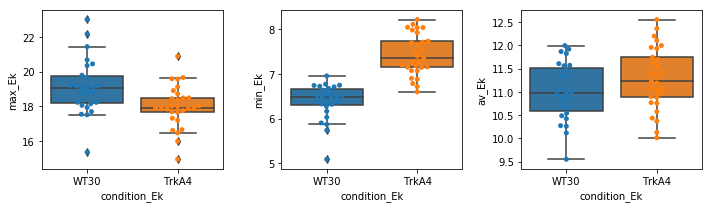

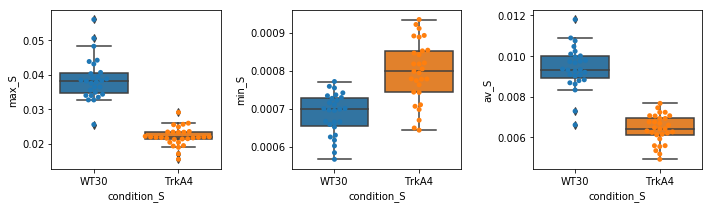

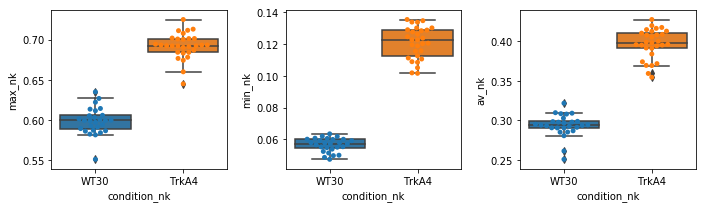

In [14]:
for vnum, var in enumerate(varlist[1:]):
    fig,axes=plt.subplots(1,3,figsize=(10,3))
    for knum,key in enumerate(['max_%s'%var,'min_%s'%var,'av_%s'%var]):
        ax=axes[knum]
        sns.boxplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'])
        sns.swarmplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'])
    plt.tight_layout()
    plt.show()

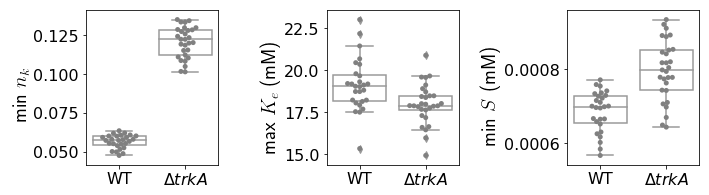

In [16]:
mpl.rcParams['font.size']=16
mpl.rcParams['text.usetex']=False

fig,axes=plt.subplots(1,3,figsize=(10,3))

ax=axes[0]
var='nk'
key='min_nk'
sns.boxplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'],color='white')
sns.swarmplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'],color='grey')
#ax.set_title('minimum $n_k$')
ax.set_ylabel('min $n_k$',useTex=True,fontsize=20)
ax=axes[1]
var='Ek'
key='max_Ek'
sns.boxplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'],color='white')
sns.swarmplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'],color='grey')
#ax.set_title('maximum $E_k$')
ax.set_ylabel('max $K_e$ (mM)',useTex=True,fontsize=20)
ax=axes[2]
var='S'
key='min_S'
sns.boxplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'],color='white')
sns.swarmplot(x='condition_%s'%var,y=key,data=df_all,ax=ax,order=['WT30','TrkA4'],color='grey')
#ax.set_title('minimum $S$')
ax.set_ylabel('min $S$ (mM)',useTex=True,fontsize=20)

for ax in axes:
    ax.set_xlabel('')
    ax.set_xticklabels(['WT','$\Delta trkA$'])
plt.tight_layout()
plt.savefig(os.path.join(figsdir,'understand_TrkA.pdf'),bbox_inches='tight')
plt.show()